In [1]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

In [2]:
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

# Одномерная регрессия

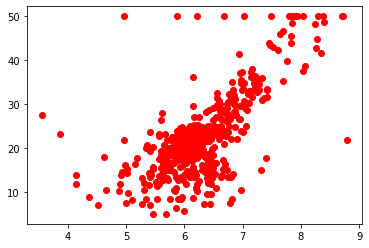

In [4]:
plt.scatter(boston.data[:,5], boston.target, color='r') # 5 - ср. число комнат в жилом помещении

In [5]:
lr = LinearRegression()

In [6]:
x = boston.data[:,5]
y = boston.target
x = np.transpose(np.atleast_2d(x))
lr.fit(x,y)
y_predicted = lr.predict(x)

Text(0, 0.5, 'real')

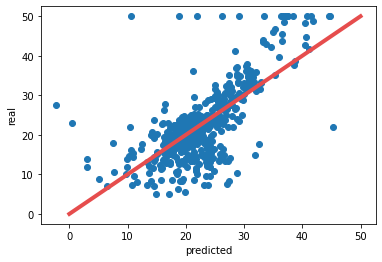

In [7]:
fig, ax = plt.subplots()
# Plot a diagonal (for reference):
ax.plot([0, 50], [0, 50], '-', color=(.9,.3,.3), lw=4)

# Plot the prediction versus real:
ax.scatter(y_predicted, boston.target)

ax.set_xlabel('predicted')
ax.set_ylabel('real')

In [8]:
rmse = round(np.sqrt(mean_squared_error(y,y_predicted)),4)
print(f'корень Квадрат среднеквадрат. погрешности: {rmse}')

корень Квадрат среднеквадрат. погрешности: 6.6031


In [9]:
# Коэф детерминации (сравнение ср. квадр. погр и нудевой модели)
r2 = round(r2_score(y,y_predicted),4)
print(f'R^2: {r2}')

R^2: 0.4835


# Многомерная регрессия

In [10]:
x = boston.data
y = boston.target

In [11]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [12]:
y_predicted = lr.predict(x)

Text(0, 0.5, 'real')

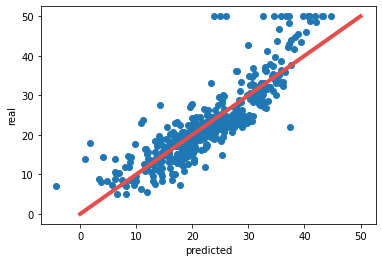

In [13]:
fig, ax = plt.subplots()
# Plot a diagonal (for reference):
ax.plot([0, 50], [0, 50], '-', color=(.9,.3,.3), lw=4)

# Plot the prediction versus real:
ax.scatter(y_predicted, boston.target)

ax.set_xlabel('predicted')
ax.set_ylabel('real')

In [14]:
rmse = round(np.sqrt(mean_squared_error(y,y_predicted)),4)
print(f'корень Квадрат среднеквадрат. погрешности: {rmse}')

корень Квадрат среднеквадрат. погрешности: 4.6792


In [15]:
# Коэф детерминации (сравнение ср. квадр. погр и нудевой модели)
r2 = round(r2_score(y,y_predicted),4)
print(f'R^2: {r2}')

R^2: 0.7406


# Регрессия со штрафом

In [16]:
# L1  - к регрессия прибавляется сумма абсолютных значений (по модулю) (Lasso)
# L2 - - // - сумма их квадратов (Ridge)
for name, met in [
        ('linear regression', LinearRegression()), #LR
        ('lasso()', Lasso()), # L1
        ('elastic-net(.5)', ElasticNet(alpha=0.5)), 
        ('lasso(.5)', Lasso(alpha=0.5)), # L1
        ('ridge(.5)', Ridge(alpha=0.5)), #L2
]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data:
    p = met.predict(x)
    r2_train = r2_score(y, p)

    # Now, we use 10 fold cross-validation to estimate generalization error
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    p = np.zeros_like(y)
    for train, test in kf.split(x):
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {}'.format(r2_train))
    print('R2 on 5-fold CV: {}'.format(r2_cv))
    print()
    print()

Method: linear regression
R2 on training: 0.7406426641094094
R2 on 5-fold CV: 0.7217447856522257


Method: lasso()
R2 on training: 0.6825842212709925
R2 on 5-fold CV: 0.6604944965281463


Method: elastic-net(.5)
R2 on training: 0.7056176997612844
R2 on 5-fold CV: 0.6889557148265719


Method: lasso(.5)
R2 on training: 0.7140164719858566
R2 on 5-fold CV: 0.6947881216568397


Method: ridge(.5)
R2 on training: 0.739957023371629
R2 on 5-fold CV: 0.7205751549533397


